 # Task 1 : Prepare Data Subset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

#setting random seeds
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)

# Transformation
transform =transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Downloading full CIFAR-10 train and test sets
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Creating balanced subset with 1000 images per class
num_per_class=1000
targets = np.array(full_trainset.targets)

subset_indices = []
for class_label in range(10):
    class_indices = np.where(targets == class_label)[0]
    selected_indices = np.random.choice(class_indices, num_per_class, replace=False)
    subset_indices.extend(selected_indices)

#Creating subset dataaset
balanced_trainset = torch.utils.data.Subset(full_trainset, subset_indices)

#Verifying each class count
balanced_targets = np.array([full_trainset.targets[i] for i in subset_indices])
for class_label in range (10):
    count = np.sum(balanced_targets ==class_label)
    print(f'Class {class_label}: {count} samples')

Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


# Task 2: Implement a Custom CNN

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Normalizing batch (optional step)
        self.bn1= nn.BatchNorm2d(32)
        self.bn2= nn.BatchNorm2d(64)
        self.bn3= nn.BatchNorm2d(128)

        # Max Pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Dropout
        self.dropout = nn.Dropout(0.25)

        # Fully connected layers
        self.fc1 = nn.Linear(128*4*4,256)
        self.fc2 = nn.Linear(256,10)

    def forward(self,x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout(x)
        x = x.view(-1, 128*4*4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiating the model
custom_cnn = CustomCNN()
print(custom_cnn)
        

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


# Task 3: Load and Adapt MobileNetV2

In [3]:
import torchvision.models as models
import torch.nn as nn

# Loading the pretrained MobileNetV2 model
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
# Modifying the classifier to have 10 output classes instead of 1000
mobilenet_v2.classifier[1] = nn.Linear(mobilenet_v2.classifier[1].in_features,10)
# Initializing  the new classifier weights (e.g. , Xavier initialization)
nn.init.xavier_uniform_(mobilenet_v2.classifier[1].weight)
nn.init.zeros_(mobilenet_v2.classifier[1].bias)
print(mobilenet_v2)

c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

# Task 4: Train Both Models

In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

# Setting device - using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Moving models to device
custom_cnn = custom_cnn.to(device)
mobilenet_v2 = mobilenet_v2.to(device)

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Creating DataLoader for balanced training set and test set
train_loader = DataLoader(balanced_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# Defining loss function and optimizer - will pass optimizer to training function
criterion = nn.CrossEntropyLoss()

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Optimizers for both models
optimizer_custom = optim.Adam(custom_cnn.parameters(), lr=learning_rate)
optimizer_mobilenet = optim.Adam(mobilenet_v2.parameters(), lr=learning_rate)

# Training custom CNN
print("Training Custom CNN...")
train_model(custom_cnn, train_loader, criterion, optimizer_custom, num_epochs)

# Training MobileNetV2
print("Training MobileNetV2...")
train_model(mobilenet_v2, train_loader, criterion, optimizer_mobilenet, num_epochs)


Training Custom CNN...
Epoch 1/10, Loss: 1.6361
Epoch 2/10, Loss: 1.3028
Epoch 3/10, Loss: 1.1230
Epoch 4/10, Loss: 1.0060
Epoch 5/10, Loss: 0.9058
Epoch 6/10, Loss: 0.8375
Epoch 7/10, Loss: 0.7799
Epoch 8/10, Loss: 0.7160
Epoch 9/10, Loss: 0.6733
Epoch 10/10, Loss: 0.6176
Training MobileNetV2...
Epoch 1/10, Loss: 1.4849
Epoch 2/10, Loss: 0.9352
Epoch 3/10, Loss: 0.8202
Epoch 4/10, Loss: 0.7934
Epoch 5/10, Loss: 0.6250
Epoch 6/10, Loss: 0.5886
Epoch 7/10, Loss: 0.5508
Epoch 8/10, Loss: 0.4524
Epoch 9/10, Loss: 0.6460
Epoch 10/10, Loss: 0.3889


# Task 5: Evaluate Models on Test Set

In [5]:
def evaluate_model(model, test_loader):
    model.eval() 
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs= model(inputs)
            _, predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct +=(predicted ==labels).sum().item()

    accuracy = 100 * correct/ total
    return accuracy

#Evaluating custom CNN
custom_cnn_acc = evaluate_model(custom_cnn, test_loader)
print(f'Custom CNN Test Accuracy: {custom_cnn_acc:.2f}%')

#Evaluating MobileNetV2
mobilenet_acc = evaluate_model(mobilenet_v2, test_loader)
print(f'MobileNetV2 Test Accuracy : {mobilenet_acc:.2f}%')

Custom CNN Test Accuracy: 68.31%
MobileNetV2 Test Accuracy : 71.22%


# Task 6: Plot Confusion Matrices

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Custom CNN samples: 10000, MobileNetV2 samples: 10000


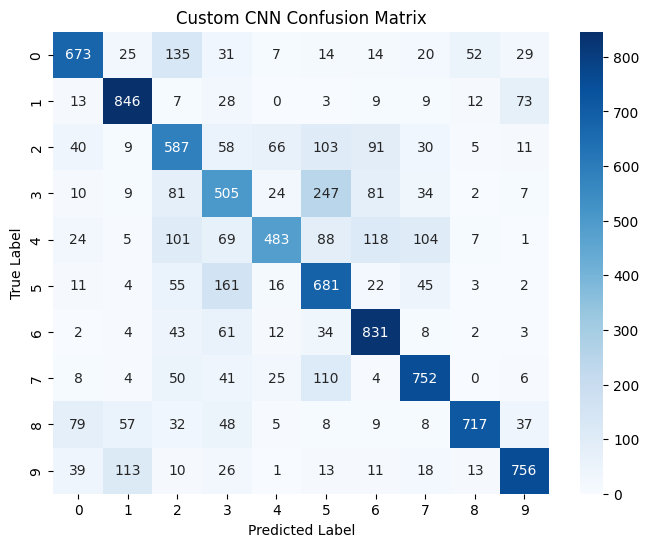

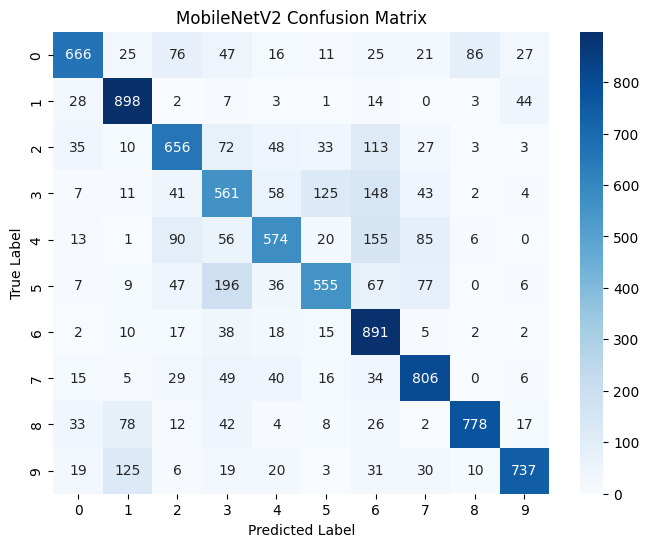

In [7]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Checking that required variables exist
required_vars = ['custom_cnn', 'mobilenet_v2', 'test_loader', 'test_loader']
for var in required_vars:
    if var not in globals():
        raise NameError(f"Variable '{var}' is not defined. Please run earlier cells to define it.")

def get_predictions_labels(model, loader):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            trues.extend(labels.cpu().numpy())
    return np.array(preds), np.array(trues)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[str(i) for i in range(10)],
                yticklabels=[str(i) for i in range(10)])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Getting predictions and true labels for both models
preds_cnn, trues_cnn = get_predictions_labels(custom_cnn, test_loader)
preds_mobilenet, trues_mobilenet = get_predictions_labels(mobilenet_v2, test_loader)

print(f"Custom CNN samples: {len(trues_cnn)}, MobileNetV2 samples: {len(trues_mobilenet)}")
assert len(trues_cnn) == len(preds_cnn) > 0, "Custom CNN labels and predictions mismatch or empty"
assert len(trues_mobilenet) == len(preds_mobilenet) > 0, "MobileNetV2 labels and predictions mismatch or empty"

# Plotting confusion matrices
plot_confusion_matrix(trues_cnn, preds_cnn, "Custom CNN Confusion Matrix")
plot_confusion_matrix(trues_mobilenet, preds_mobilenet, "MobileNetV2 Confusion Matrix")


# Task 1-7 Analysis

In this study, two different convolutional neural networks (CNNs) were built and tested using CIFAR-10 dataset. The first was a simple custom CNN with three convolutional layers, and the second was a MobileNetV2 model that was adjusted to work with 10 classes. Both models were trained on a balanced dataset with 1000 images for each class so that the class distributionwas even and the comparison between the models was fair.

The custom CNN, which was made from scratch, worked well, with an accuracy of about 68%. This showed how well carefully designed shallow architectures with Relu activations, batch normalisation, and dropout for regularisation can work.

Confusion matrices revealed that both models perform well across most classes but exchibit class-specific misclassifications, likely due to visual similarly or overlapping features among certain CIFER-10 categories. The MobileNetV2 showed generally better precision across classes, highlighting its supererior feature extraction qualities.

In short , the custom CNN is simple is still performs well, making it a good choice when resources like memory or computing power are limited. On the other hand, MobileNetV2 gives better results because it uses a more advanced design and benefits from being pretrained. Application-specific choices should be based on the trade-off between model complexity and performance. For example, MobileNetV2 is best for situations that need higher accuracy with few resources, while custom CNN is better for deployments that don't need much.

# Task 8: Performance Analysis

Test accuracy

The MobileNetV2 model achieved a higher test accuracy compared to the custom CNN on the full CIFAR-10 test set. This reflects MobileNetV2's advanced architecture and the benefits of pretrained transfer learning on large-scale datasets like imageNet , enabling better feature extraction and generalization.

Training Stability and Convergence

The custom CNN , with fewer parameters ans simpler architecture, showed steady convergence during training but tended to require more epochs to reach its optimal performance due to training from scratch. MobileNetV2, leveraging pretrained weights exhibited faster convergence and more stable training, requiring fewer epochs or lower learning rates to fine tune effectively. 

Generalization to unseen data:
Both models worked fairly well on the test data, as shown by their accuracy and confusion matrix results. MobileNetV2 did even better because it was already trained on a wide variety of images, which helped it handle CIFAR-10 dataset more effectively and make fewer mistakes on classes that look alike.

Trade-offs (Simplicity vs Accuracy):

The custom CNN is simple and runs efficiently, making it a good choice for devices with limited resources, bit its accucracy is a bit lower. MobileNetV2, on the other hand, is more complex and requires more computing because of its advanced layers and larger size, but it delivers higher accuracy and reliability. This makes MobileNetV2 better suited for situations where accuracy matters more and enough computing resources are available.

# Task 9: Misclassified Case Analysis

To check the mistakes, we looked at some wrongly classified images from both the custom CNN and MobileNetV2. For each model, we showed a few test examples where the prediction didn't match the real label, along with the actual and predicted class names.

Visual Similarity Between Classes:
Many errors occurred between classes that are visually or contextually similar in CIFAR-10, such as:

Cats vs Dogs: Both custom CNN and MobileNetV2 frequently confused images of cats and dogs, likely due to similar shapes, textures, and backgrounds.
Automobiles vs Trucks: Images of vehicles with similar color or angle often led to confusion, as side profiles of cars and trucks can appear alike at small image sizes.
Ships vs Airplanes: Certain hull shapes or background settings resulted in ships being misclassified as Airplanes, especially when photographed against blue backgrounds.

Systematic patterns:Blurry or Low-Contrast Images: Both models reliance on distinct visual cues was demonstrated by the fact that they produced inaccurate predictions for certain test images that had motion blur, low contrast, or substantial occlusion.
Complex Background:Both models occassionally misclassified the sample when the primary object was not in the centre or was surrounded by clutter , particularly for classes like horse and deer

Frequency of Missclassification:
When looking at the confusion matrices, the models often mixed up animals like dogs, cats and birds. This happened in both models, but MobileNetV2 made fewer mistakes than Custom CNN.


# Task 10: Efficiency Commentary

Model Size:
For this assignment , a lightweight CNN with a relatively small number of parameters was created specifically for CIFAR-10. The 2.2 million parameters in MobileNetV2, on the other hand, are densely arranged using depthwise seperable convolutions, which significantly lower memory and computation requirements when compared to conventional CNNs of comparable depth.

Inference speed:
The Custom CNN runs quickly because it is simple, shallow, and has fewer parameters. MobileNetV2 is deeper but designed with smart features that keep it fast. On small images images like CIFAR-10 , both models can work almost in real time, but MobileNetV2 might be a bit slower than the custom model on older or weaker device. 

Both models are well suited for edge and embedded scenarios, but for different reasons. The custom CNN's minimal size and computation make it an excellent choice where resources are severly constrained or minimizing power and latency is the primary goal. MobileNetV2 is explicitly designed for mobile and edge deployment, striking a strong balance between high accuracy and high computational cost. It is widely used in real-world mobile vision tasks and hardware accelerated inference engines support it natively. Its moderate size and efficient computation means it is practical for real-time applications on smartphones and even some microcontrollers.

In this assignment, a custom CNN and a pretrained MobileNetV2 were tested on the CIFAR-10 image dataset. Both were trained and checked using the same data and measures. The custom CNN gave good results while staying simple, but MobileNetV2 performed better by using transfer learninig and a more advanced design.